In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
boston =load_boston()


In [3]:
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [4]:
# boston.feature_names
# boston.target
# boston.DESCR


In [5]:
bos=pd.DataFrame(boston.data,columns=boston.feature_names)

In [6]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
bos['target']=boston.target

In [8]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


1. There is no null value in any column

In [10]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


let's check for outliers

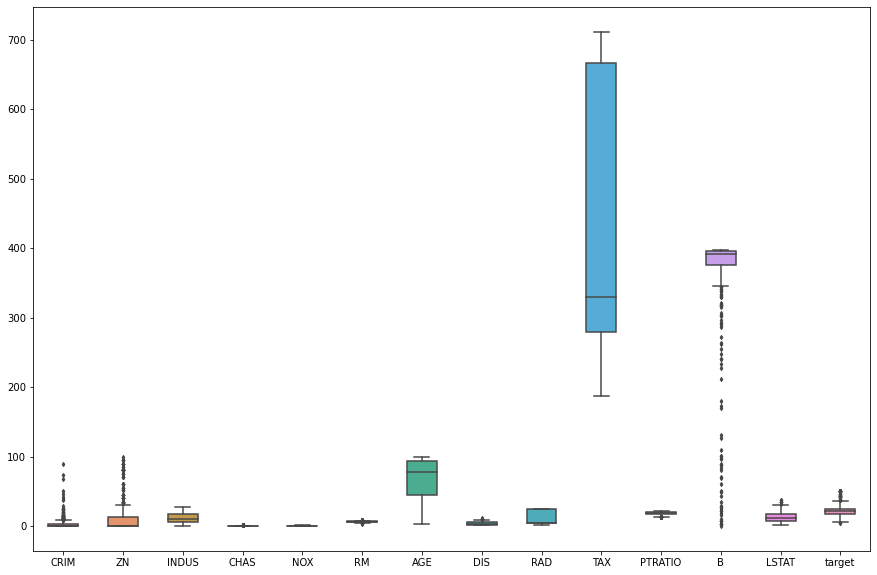

In [13]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=bos, width= 0.5,ax=ax,  fliersize=3)

In [14]:
q = bos['CRIM'].quantile(0.95)
# we are removing the top 5% data from the CRIM column
data_cleaned = bos[bos['CRIM']<q]

q = data_cleaned['ZN'].quantile(0.93)
# we are removing the top 7% data from the ZN column
data_cleaned  = data_cleaned[data_cleaned['ZN']<q]

q = data_cleaned['B'].quantile(0.19)
# we are removing the below 19% data from the B column
data_cleaned  = data_cleaned[data_cleaned['B']>q]

q = data_cleaned['LSTAT'].quantile(0.99)
# we are removing the top 1% data from the LSTAT column
data_cleaned  = data_cleaned[data_cleaned['LSTAT']<q]

q = data_cleaned['target'].quantile(0.99)
# we are removing the top 1% data from the target column
data_cleaned  = data_cleaned[data_cleaned['target']<q]

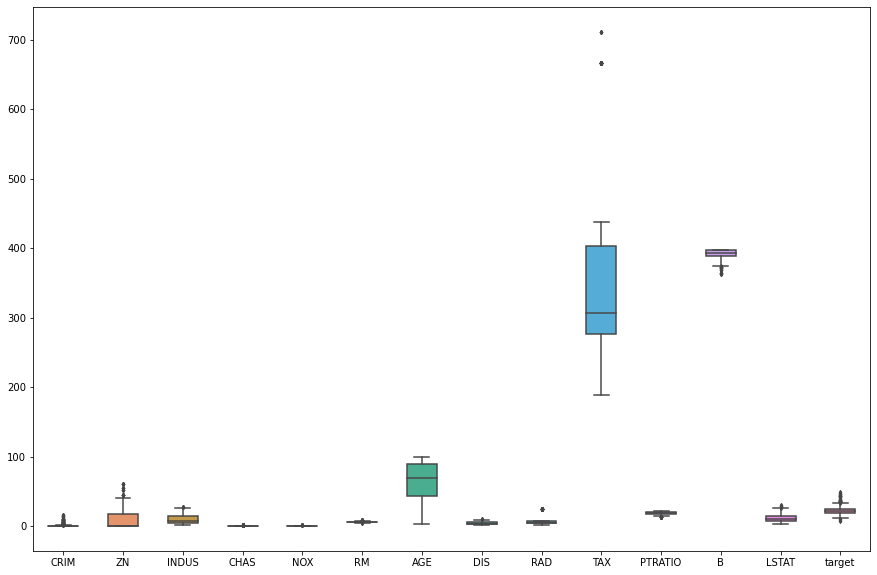

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_cleaned, width= 0.5,ax=ax,  fliersize=3)

In [16]:
X=data_cleaned.drop(columns=['target'],axis=1)
y=data_cleaned.target

Next, with the help of graphics we will try to  measures the linear relationships between the variables. 

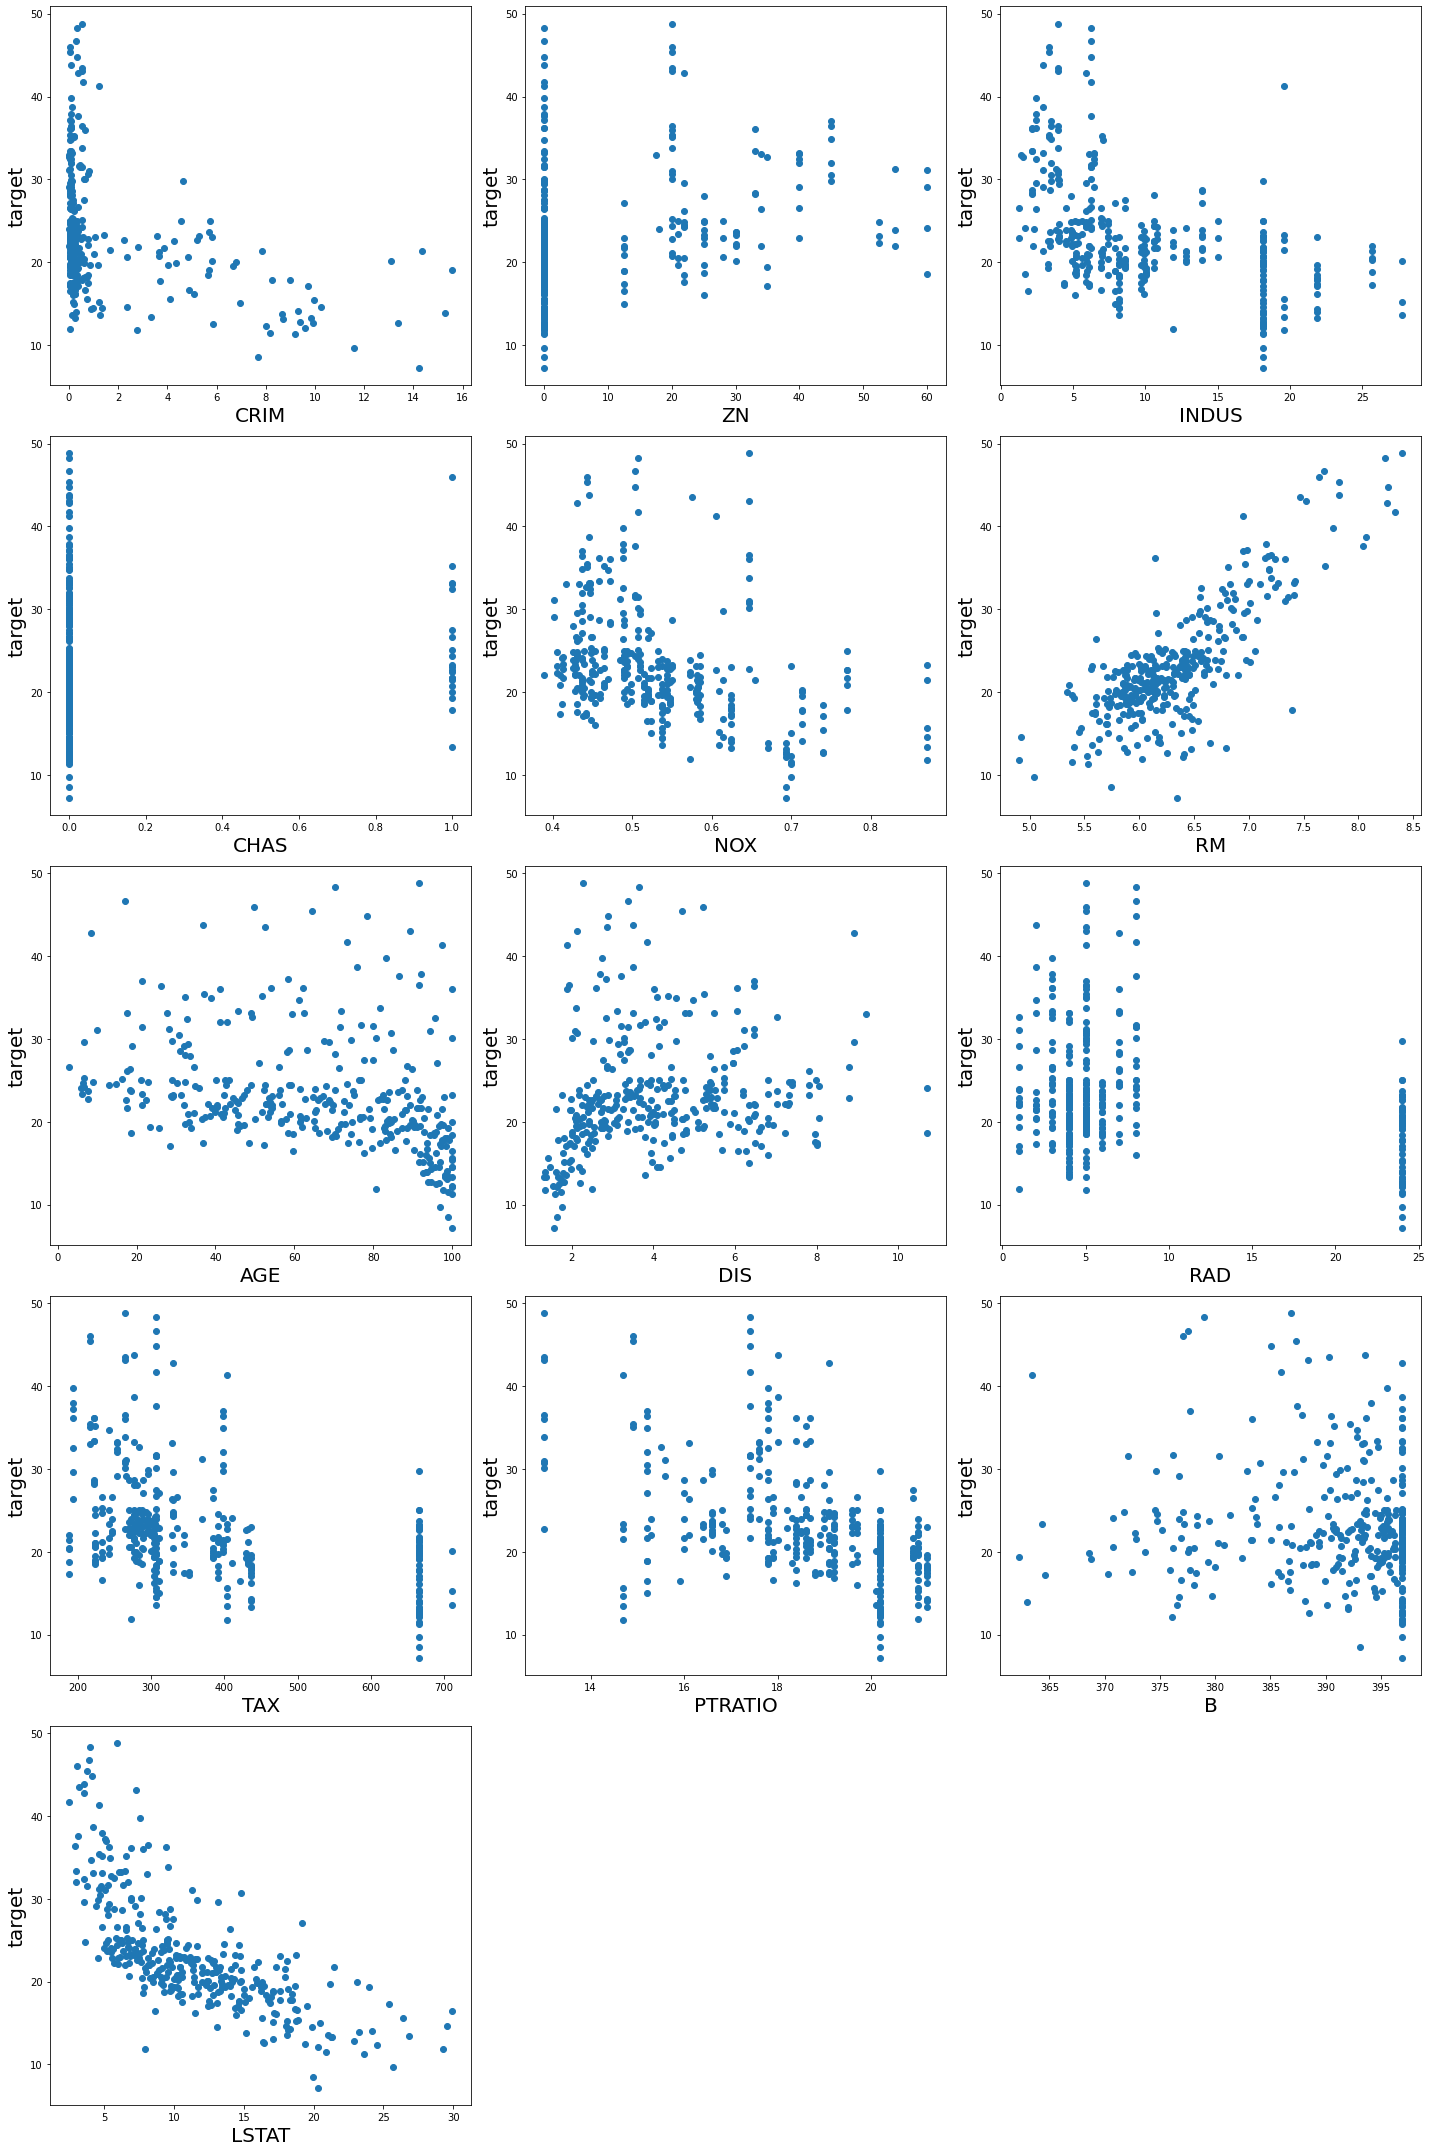

In [17]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=13 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('target',fontsize=20)
    plotnumber+=1
plt.tight_layout()

we can see only RM has positive and LSTAT has negative relation. 
so, we will create a correlation matrix to understand measures more accurately. 

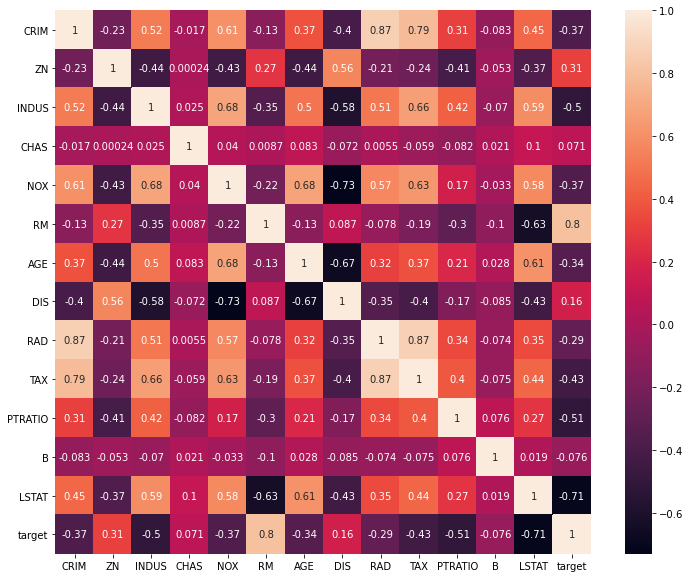

In [18]:
f,ax=plt.subplots(figsize=(12,10))
sns.heatmap(data=data_cleaned.corr(),annot=True)

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

Observations:

To fit a linear regression model, we select those features which have a high correlation with our target variable target. By looking at the correlation matrix we can see that RM has a strong positive correlation with target (0.8) where as LSTAT has a high negative correlation with target(-0.71).


An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.87. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model.  Same goes for the features DIS and AGE which have a correlation of -0.67.

In [19]:
data_cleaned=data_cleaned.drop(columns=['TAX','DIS'],axis=1)

In [20]:
# X=data.drop(columns=['target'],axis=1)
X=data_cleaned.drop(columns=['target'],axis=1)
y=data_cleaned.target

In [22]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.20,random_state=3)

In [24]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

In [25]:
regression.score(x_train,y_train)

0.8025072950541955

In [26]:
y_pred=regression.predict(x_train)

In [27]:
from sklearn.metrics import r2_score
r2=r2_score(y_train,y_pred)
print(r2)

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_train, y_pred, squared=False)
print(rms)

0.8025072950541955
3.1696064322656246


In [28]:
regression.score(x_test,y_test)

0.7961334617688259

In [29]:
y_t_pred=regression.predict(x_test)

In [30]:
r2=r2_score(y_test,y_t_pred)
print(r2)

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_test, y_t_pred, squared=False)
print(rms)

0.7961334617688259
3.0400473799251575


In [31]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [32]:
adj_r2(x_train,y_train)

0.7942471438967664

so now we can conclude that our model is almost working same for training as well as for testing dataset.Even if we add more features in this mdoel still it is not too much affected bcz our adjusted r2 is also almost same as r2

lets check whether our model is overfitted or not

In [33]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([3.38147233, 2.05685839, 2.6769603 , 6.33044238, 5.98138085,
       9.38286476, 4.17791617, 8.61895103, 1.4418705 , 7.35300928,
       7.84536444, 7.76638763, 5.6064311 , 7.37332735, 5.21261711,
       1.16839321, 4.89910532, 7.6731007 , 9.92331406, 3.36799462,
       5.14435701, 2.09553689, 5.07969137, 9.45062432, 5.65372575,
       6.62001406, 7.6741165 , 4.32081032, 1.34571343, 1.56172516,
       0.76618017, 1.16480606, 4.84575326, 1.56502248, 5.51204267,
       6.61158996, 1.49287056, 3.80049733, 8.90325265, 7.65113906,
       2.41660905, 3.30618303, 1.7199053 , 4.94490648, 8.39130928,
       0.46876939, 8.39744741, 9.26405954, 8.28074588, 7.50905221]),
        cv=10, normalize=True)

In [34]:
ridgecv.alpha_

0.46876939345613544

In [35]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.46876939345613544)

In [36]:
ridge_model.score(x_test, y_test)

0.7963806454104823

In [37]:
ridge_model.score(x_train, y_train)

0.8025041309864985

Through ridge we were checking whether our is overfitted or not .now results are same so we can safely say our model is correct.